# Import packages

In [1]:
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from keras import models
from keras import layers
from keras import optimizers
from keras import applications
from keras.optimizers import Adam
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,Conv2D,MaxPooling2D,BatchNormalization
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tqdm import tqdm
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

from keras import backend as K
from keras.layers import Activation,Dense

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('train')
types = os.listdir('train')
print(types)

['cancer', 'non-cancer']


In [3]:
print("Types of data",len(types))

Types of data 2


# Image preprocessing

In [4]:
oral=[]
for item in dataset_path:
    folder = os.listdir('train'+'/'+item)
    for file2 in folder:
        oral.append((item,str('train'+'/'+item)+'/'+file2))


In [5]:
df = pd.DataFrame(data=oral,columns=['cancer type','image'])
df.head()

,cancer type,image
0,cancer,train/cancer/01960a64-cfe8-444d-bbc5-575c15389...
1,cancer,train/cancer/01960a64-cfe8-444d-bbc5-575c15389...
2,cancer,train/cancer/01960a64-cfe8-444d-bbc5-575c15389...
3,cancer,train/cancer/01960a64-cfe8-444d-bbc5-575c15389...
4,cancer,train/cancer/01960a64-cfe8-444d-bbc5-575c15389...


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancer type', ylabel='count'>

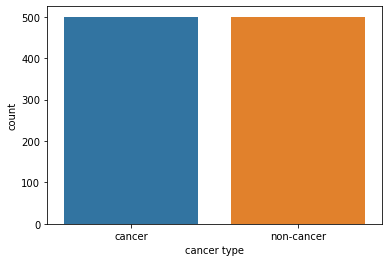

In [6]:
import seaborn as sns
sns.countplot(df['cancer type'])

In [7]:
print('Total number of image:',len(df))

Total number of image: 1000


In [8]:
oral_count = df['cancer type'].value_counts()
print(oral_count)

non-cancer    500
cancer        500
Name: cancer type, dtype: int64


In [9]:
import cv2
path = 'train/'
im_size = 224
images = []
labels = []

for i in dataset_path:
    datapath = path+ str(i)
    filenames = [i for i in os.listdir(datapath)]
    
    for f in filenames:
        img = cv2.imread(datapath+'/'+ f)
        img = cv2.resize(img,(im_size,im_size))
        images.append(img)
        labels.append(i)
        

In [10]:
images = np.array(images)
images.shape

(1000, 224, 224, 3)

In [11]:
images = images.astype('float32')/255.0

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y = df['cancer type'].values
print(y[:5])

# for y
# converting string label to numerical for label encoding is required

y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)



['cancer' 'cancer' 'cancer' 'cancer' 'cancer']


In [13]:
y = y.reshape(-1,1)
onhot = OneHotEncoder()
Y = onhot.fit_transform(y).todense()
Y.shape

(1000, 2)

# Train and test splitting

In [14]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images,Y = shuffle(images,Y,random_state = 1)

X_train,X_test,y_train,y_test = train_test_split(images,Y,test_size=20,random_state=415)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(980, 224, 224, 3)
(20, 224, 224, 3)
(980, 2)
(20, 2)


In [15]:
num_classes = 2
epochs = 25

# Alexnet Architecture

In [16]:


model = Sequential()
  
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (224, 224, 3), 
            kernel_size = (11, 11), strides = (4, 4), 
            padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling 
model.add(MaxPooling2D(pool_size = (2, 2),
            strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), 
            padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), 
            padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# Flattening
model.add(Flatten())
  
# 1st Dense Layer
model.add(Dense(4096, input_shape = (224*224*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
  
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropoutmodel.fit(x_train, y_train, epochs=100)
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
  
# Output Softmax Layer
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

In [17]:
from keras.optimizers import SGD
optimizer = SGD(lr=0.0001,momentum=0.9,decay=1e-4/epochs)

In [18]:
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', 
    patience=4, 
    min_delta=0.001, 
    mode='max')

# Train

In [34]:
history = model.fit(X_train,y_train, epochs=epochs,validation_split=0.1, 
    batch_size=32, 
    verbose=2,callbacks=[early_stopping])

Epoch 1/25
28/28 - 84s - loss: 0.0722 - accuracy: 0.9898 - val_loss: 0.6701 - val_accuracy: 0.5918
Epoch 2/25
28/28 - 100s - loss: 0.0527 - accuracy: 0.9921 - val_loss: 0.6853 - val_accuracy: 0.5714
Epoch 3/25
28/28 - 89s - loss: 0.0545 - accuracy: 0.9932 - val_loss: 0.6625 - val_accuracy: 0.5816
Epoch 4/25
28/28 - 77s - loss: 0.0539 - accuracy: 0.9898 - val_loss: 0.6613 - val_accuracy: 0.5918
Epoch 5/25
28/28 - 77s - loss: 0.0407 - accuracy: 0.9977 - val_loss: 0.6396 - val_accuracy: 0.6020
Epoch 6/25
28/28 - 78s - loss: 0.0390 - accuracy: 0.9921 - val_loss: 0.5296 - val_accuracy: 0.6837


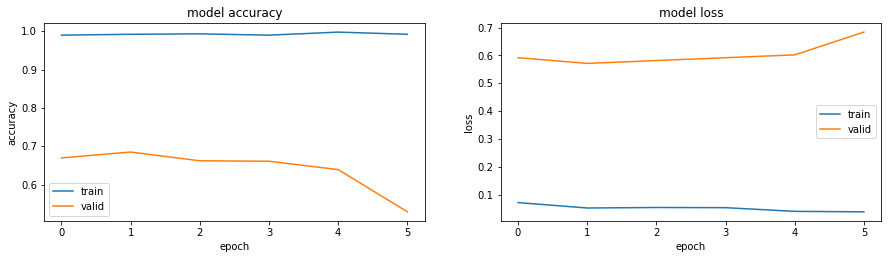

In [50]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)

print(loss,accuracy)

1/1 [==============================] - 0s 405ms/step - loss: 0.6702 - accuracy: 0.6000
0.6702011823654175 0.6000000238418579


# Prediction

In [36]:
pred = model.predict(X_test)
pred.shape

(20, 2)

In [37]:
pred

array([[0.41336635, 0.7705829 ],
       [0.03758478, 0.98417854],
       [0.05566257, 0.9724822 ],
       [0.2769001 , 0.8749145 ],
       [0.5932497 , 0.6852931 ],
       [0.2932809 , 0.84623337],
       [0.53578925, 0.52103513],
       [0.23603198, 0.96980274],
       [0.04915696, 0.9839785 ],
       [0.04915696, 0.9839785 ],
       [0.47909218, 0.8233625 ],
       [0.5232273 , 0.7030401 ],
       [0.4779654 , 0.78024685],
       [0.73345405, 0.64579374],
       [0.78260255, 0.52478945],
       [0.0536527 , 0.9845152 ],
       [0.0670163 , 0.97077334],
       [0.63200426, 0.7413197 ],
       [0.08738747, 0.9700788 ],
       [0.23049107, 0.898584  ]], dtype=float32)

In [51]:
model.save("Model_AlexNet.h5")

# Testing

In [ ]:
from keras.models import load_model
from collections import deque
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt

In [ ]:
model = load_model('Model_AlexNet.h5')

In [48]:
from keras.preprocessing import image
# from tkinter.filedialog import askopenfile
# file = askopenfile(mode='r',filetypes=[('All files','*.jpg')])
# image1 = cv2.imread(str(file.name))
image1 = cv2.imread(r'E:\berlin\Oral cancer\train\non-cancer\69293_mouth-exam-child-iStock-510174422.jpg_ccba64ac-3050-4b37-9641-ca94b3db2c11 - Copy - Copy (4).jpeg')
imag = cv2.resize(image1, (224,224))
x = image.img_to_array(imag)
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
#model = load_model('my_model_v1.h5')
classes = model.predict_classes(images,batch_size=32)[0]
print(classes)

1


In [52]:
dict = {0:'cancer',1:'Non cancer'}
dict.get(classes)

'Non cancer'

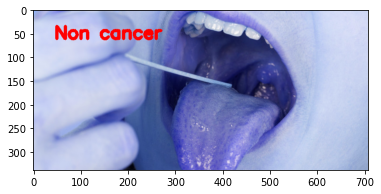

In [54]:
cv2.putText(image1,str(dict.get(classes)),(45,60),cv2.FONT_HERSHEY_SIMPLEX,1.25,(255,0,0),5)  
plt.imshow(image1)
plt.show()